# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + f"&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | toga village
City not found. Skipping...
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | aasiaat
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | shimoda
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | w

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,8.12,80,0,3.48,AU,1719953397
1,adamstown,-25.0660,-130.1015,20.11,58,48,8.07,PN,1719953399
2,bethel,41.3712,-73.4140,28.85,50,0,2.57,US,1719953339
3,remire-montjoly,4.9167,-52.2667,26.02,94,0,1.54,GF,1719953208
4,arraial do cabo,-22.9661,-42.0278,22.92,78,40,3.60,BR,1719953183


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,8.12,80,0,3.48,AU,1719953397
1,adamstown,-25.0660,-130.1015,20.11,58,48,8.07,PN,1719953399
2,bethel,41.3712,-73.4140,28.85,50,0,2.57,US,1719953339
3,remire-montjoly,4.9167,-52.2667,26.02,94,0,1.54,GF,1719953208
4,arraial do cabo,-22.9661,-42.0278,22.92,78,40,3.60,BR,1719953183


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

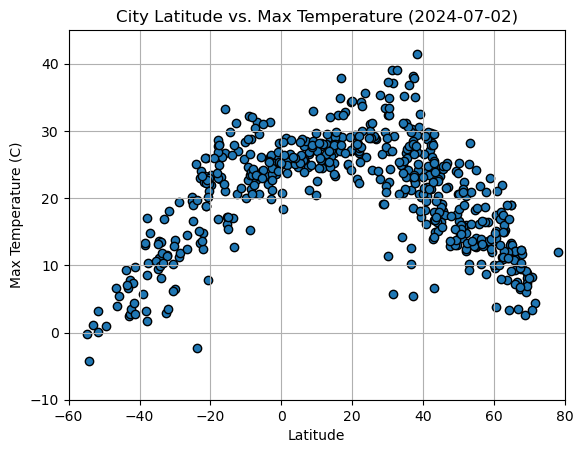

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-07-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.ylim(-10, 45)
plt.xlim(-60,80)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

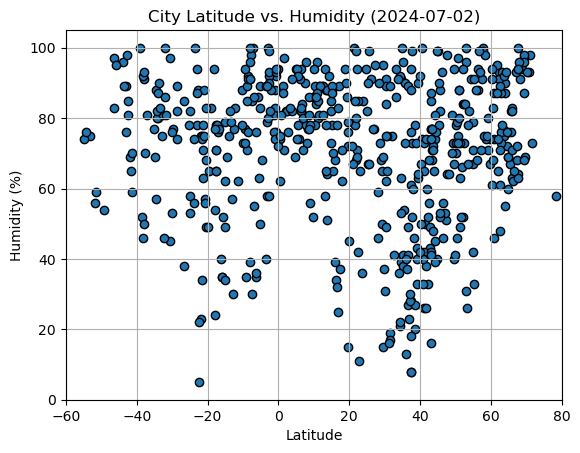

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-07-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.ylim(0, 105)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

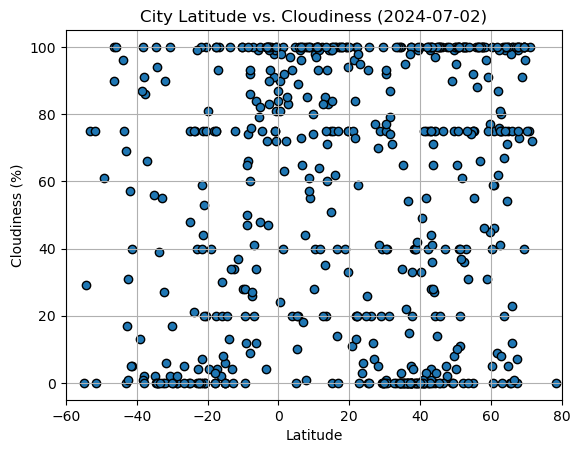

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-07-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.ylim(-5, 105)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

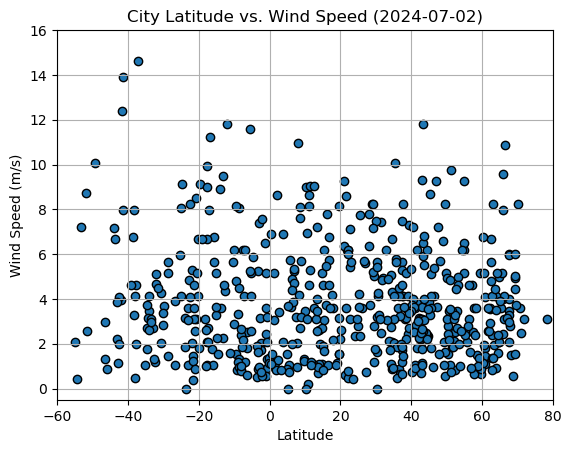

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-07-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.ylim(-.5, 16)
plt.xlim(-60,80)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [134]:
# Define a function to create Linear Regression plots
def linregress_plot(x, y, ax, ay):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    line = slope * x + intercept

    plt.scatter(x, y, edgecolors="black")
    plt.plot(x, line, color= "red")
    plt.title("Latitude vs. " + y.name)
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.annotate(equation, (ax, ay), color="red", fontsize=15)
    print("The r^2 value is: " + str(rvalue**2))
    plt.show()
    

In [124]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,28.85,50,0,2.57,US,1719953339
3,remire-montjoly,4.9167,-52.2667,26.02,94,0,1.54,GF,1719953208
6,tiksi,71.6872,128.8694,4.41,73,72,3.10,RU,1719953407
7,aasiaat,68.7098,-52.8699,2.66,94,91,0.54,GL,1719953453
9,shimoda,34.6667,138.9500,24.50,91,100,4.30,JP,1719953455


In [125]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,8.12,80,0,3.48,AU,1719953397
1,adamstown,-25.0660,-130.1015,20.11,58,48,8.07,PN,1719953399
4,arraial do cabo,-22.9661,-42.0278,22.92,78,40,3.60,BR,1719953183
5,port-aux-francais,-49.3500,70.2167,0.92,54,61,10.08,TF,1719953406
8,west island,-12.1568,96.8225,26.99,83,75,11.83,CC,1719953454


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.5047988294341633


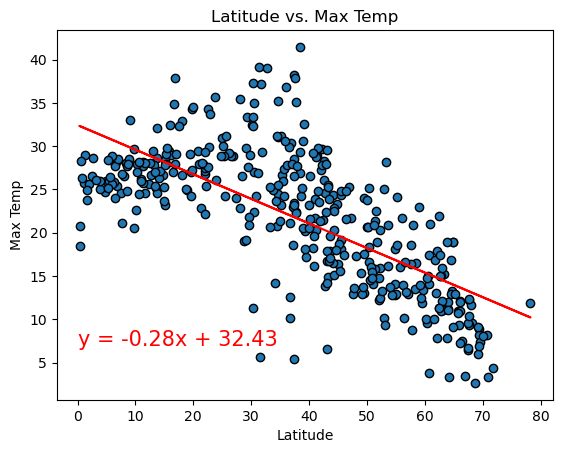

In [136]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0, 7)

The r^2 value is: 0.7010171291341929


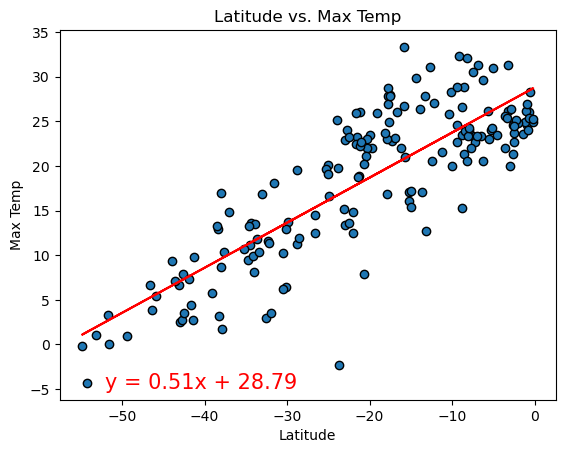

In [138]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -52, -5)

**Discussion about the linear relationship:**
- As latitude approaches 0, max temperature tends to increase.
- This is a moderate correlation overall with the southern hemisphere having a slightly stronger correlation than the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 5.462387971526654e-05


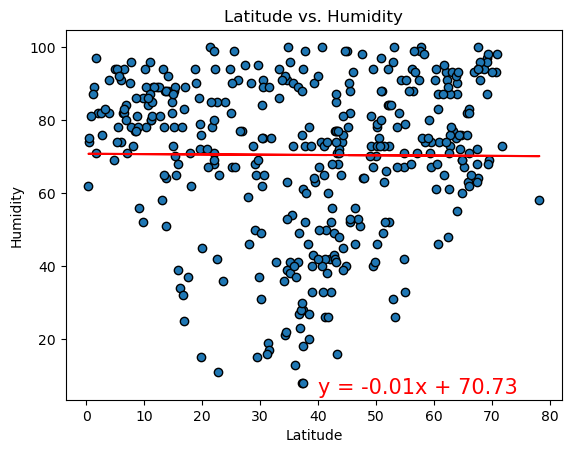

In [139]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 40, 5)

The r^2 value is: 0.0002090458022766431


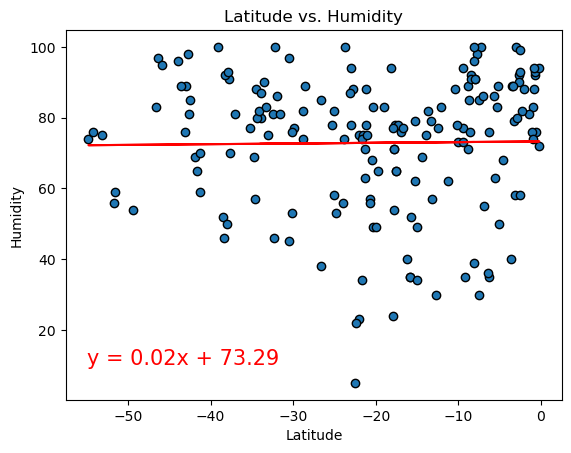

In [140]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -55, 10)

**Discussion about the linear relationship:**
- There is no correlation between latitude and humidity as slope and r^2 value are both nearly 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.00035102362450145587


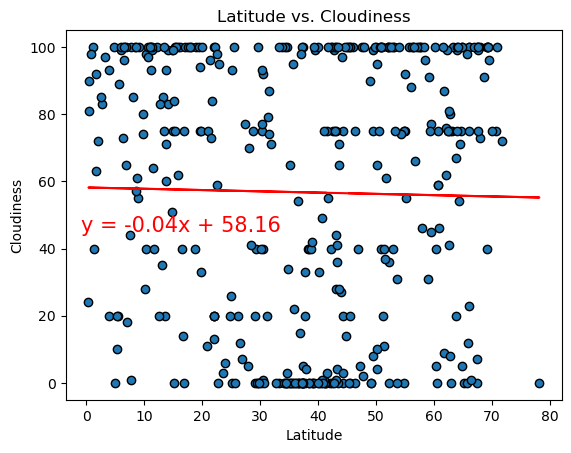

In [142]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], -1, 45)

The r^2 value is: 0.0858004868671612


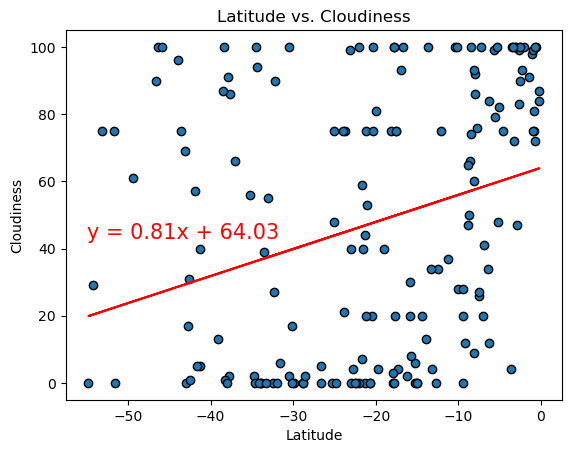

In [148]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -55, 43)

**Discussion about the linear relationship:**
- The r^2 value is nearly 0 for both northern and southern hemispheres, so there is no correlation.
- Southern hemisphere regression slope shows a positive increase as latitude approaches 0, but the data appears less dense on the more negative latitudes, especially when you compare clustering between northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.000738175146875294


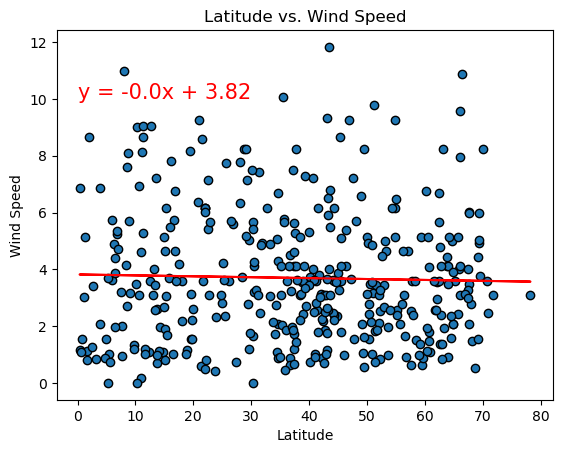

In [145]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0, 10)

The r^2 value is: 0.024757571960142506


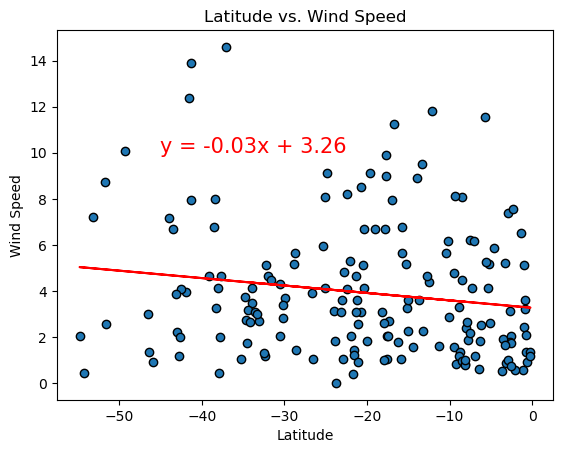

In [146]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -45, 10)

**Discussion about the linear relationship:** 
- There is no correlation between latitude and wind speed as both slope and r^2 value are nearly 0 for both hemispheres.